<a href="https://colab.research.google.com/github/SUHANI-21/MachineLearningLab/blob/main/LinearReg_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project implements a Simple Linear Regression model to predict Petal Length based on Sepal Length in the Iris dataset.
It visualizes the relationship and the regression line using Matplotlib and Seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load Iris dataset
iris_data = load_iris()

# Create a pandas DataFrame
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target

# Display first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


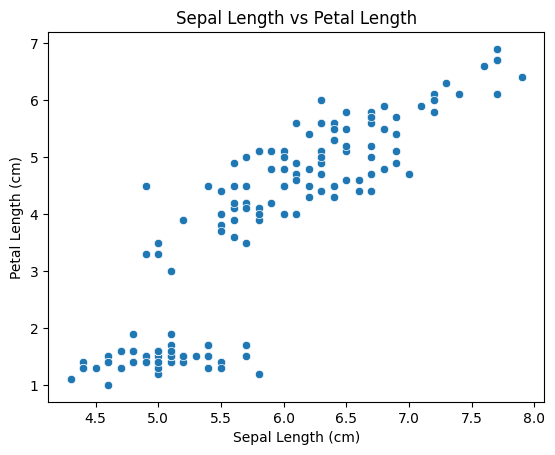

In [3]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()


In [4]:
# Select one feature (X) and one target (y)
X = df[['sepal length (cm)']]   # 2D array for sklearn
y = df['petal length (cm)']     # 1D array

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)


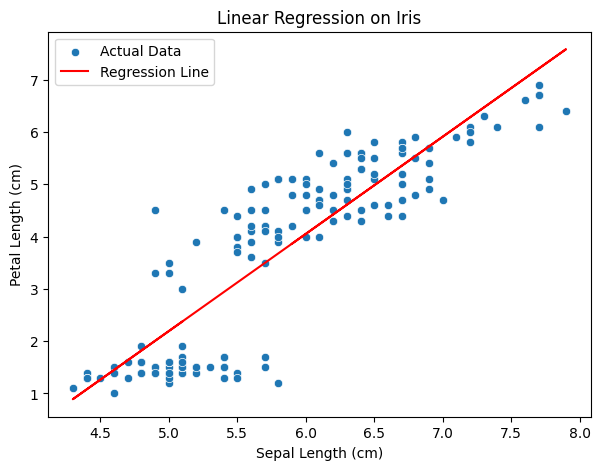

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression on Iris')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()


In [6]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Coefficient (slope): {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


Coefficient (slope): 1.858
Intercept: -7.101
Mean Squared Error: 0.743
R² Score: 0.760
